In [ ]:
install.packages("tree")
install.packages("ISLR")
install.packages("randomForest")
install.packages("caret")




#The tree library is used to construct classification trees.
library (tree)
library (ISLR)
library(randomForest)
library(caret)
library(klaR)

In [2]:
churn_modelling<-read.csv('/Users/serdaryetimoglu/Downloads/Churn_Modelling.csv')

In [3]:
head(churn_modelling)
colnames(churn_modelling)
summary(churn_modelling)


RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


[1] "RowNumber"       "CustomerId"      "Surname"         "CreditScore"    
 [5] "Geography"       "Gender"          "Age"             "Tenure"         
 [9] "Balance"         "NumOfProducts"   "HasCrCard"       "IsActiveMember" 
[13] "EstimatedSalary" "Exited"

   RowNumber       CustomerId           Surname      CreditScore   
 Min.   :    1   Min.   :15565701   Smith   :  32   Min.   :350.0  
 1st Qu.: 2501   1st Qu.:15628528   Martin  :  29   1st Qu.:584.0  
 Median : 5000   Median :15690738   Scott   :  29   Median :652.0  
 Mean   : 5000   Mean   :15690941   Walker  :  28   Mean   :650.5  
 3rd Qu.: 7500   3rd Qu.:15753234   Brown   :  26   3rd Qu.:718.0  
 Max.   :10000   Max.   :15815690   Genovese:  25   Max.   :850.0  
                                    (Other) :9831                  
   Geography       Gender          Age            Tenure          Balance      
 France :5014   Female:4543   Min.   :18.00   Min.   : 0.000   Min.   :     0  
 Germany:2509   Male  :5457   1st Qu.:32.00   1st Qu.: 3.000   1st Qu.:     0  
 Spain  :2477                 Median :37.00   Median : 5.000   Median : 97199  
                              Mean   :38.92   Mean   : 5.013   Mean   : 76486  
                              3rd Qu.:44.00   3rd Qu.: 7

In [5]:
churn_modelling_v1<-churn_modelling[-c(1:3)]

In [6]:
head(churn_modelling_v1)
colnames(churn_modelling_v1)
summary(churn_modelling_v1)


CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
619,France,Female,42,2,0.00,1,1,1,101348.88,1
608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
502,France,Female,42,8,159660.80,3,1,0,113931.57,1
699,France,Female,39,1,0.00,2,0,0,93826.63,0
850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


[1] "CreditScore"     "Geography"       "Gender"          "Age"            
 [5] "Tenure"          "Balance"         "NumOfProducts"   "HasCrCard"      
 [9] "IsActiveMember"  "EstimatedSalary" "Exited"

  CreditScore      Geography       Gender          Age            Tenure      
 Min.   :350.0   France :5014   Female:4543   Min.   :18.00   Min.   : 0.000  
 1st Qu.:584.0   Germany:2509   Male  :5457   1st Qu.:32.00   1st Qu.: 3.000  
 Median :652.0   Spain  :2477                 Median :37.00   Median : 5.000  
 Mean   :650.5                                Mean   :38.92   Mean   : 5.013  
 3rd Qu.:718.0                                3rd Qu.:44.00   3rd Qu.: 7.000  
 Max.   :850.0                                Max.   :92.00   Max.   :10.000  
    Balance       NumOfProducts    HasCrCard      IsActiveMember  
 Min.   :     0   Min.   :1.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:     0   1st Qu.:1.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 97199   Median :1.00   Median :1.0000   Median :1.0000  
 Mean   : 76486   Mean   :1.53   Mean   :0.7055   Mean   :0.5151  
 3rd Qu.:127644   3rd Qu.:2.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :250898   Max.   :4.00   Max.   :1.00

In [7]:
churn_modelling_v1$Geography=ifelse(churn_modelling_v1$Geography=="France", 1,
                     ifelse(churn_modelling_v1$Geography=="Germany", 2
                            ,3
                            ))

churn_modelling_v1$Gender=ifelse(churn_modelling_v1$Gender=="Female" , 1 , 0)

In [8]:
head(churn_modelling_v1)
colnames(churn_modelling_v1)
summary(churn_modelling_v1)

CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
619,1,1,42,2,0.00,1,1,1,101348.88,1
608,3,1,41,1,83807.86,1,0,1,112542.58,0
502,1,1,42,8,159660.80,3,1,0,113931.57,1
699,1,1,39,1,0.00,2,0,0,93826.63,0
850,3,1,43,2,125510.82,1,1,1,79084.10,0
645,3,0,44,8,113755.78,2,1,0,149756.71,1


[1] "CreditScore"     "Geography"       "Gender"          "Age"            
 [5] "Tenure"          "Balance"         "NumOfProducts"   "HasCrCard"      
 [9] "IsActiveMember"  "EstimatedSalary" "Exited"

  CreditScore      Geography         Gender            Age       
 Min.   :350.0   Min.   :1.000   Min.   :0.0000   Min.   :18.00  
 1st Qu.:584.0   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:32.00  
 Median :652.0   Median :1.000   Median :0.0000   Median :37.00  
 Mean   :650.5   Mean   :1.746   Mean   :0.4543   Mean   :38.92  
 3rd Qu.:718.0   3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:44.00  
 Max.   :850.0   Max.   :3.000   Max.   :1.0000   Max.   :92.00  
     Tenure          Balance       NumOfProducts    HasCrCard     
 Min.   : 0.000   Min.   :     0   Min.   :1.00   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:     0   1st Qu.:1.00   1st Qu.:0.0000  
 Median : 5.000   Median : 97199   Median :1.00   Median :1.0000  
 Mean   : 5.013   Mean   : 76486   Mean   :1.53   Mean   :0.7055  
 3rd Qu.: 7.000   3rd Qu.:127644   3rd Qu.:2.00   3rd Qu.:1.0000  
 Max.   :10.000   Max.   :250898   Max.   :4.00   Max.   :1.0000  
 IsActiveMember   EstimatedSalary         Exited      
 Min.   :0.000

In [9]:
install.packages("corrplot")
library(corrplot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded


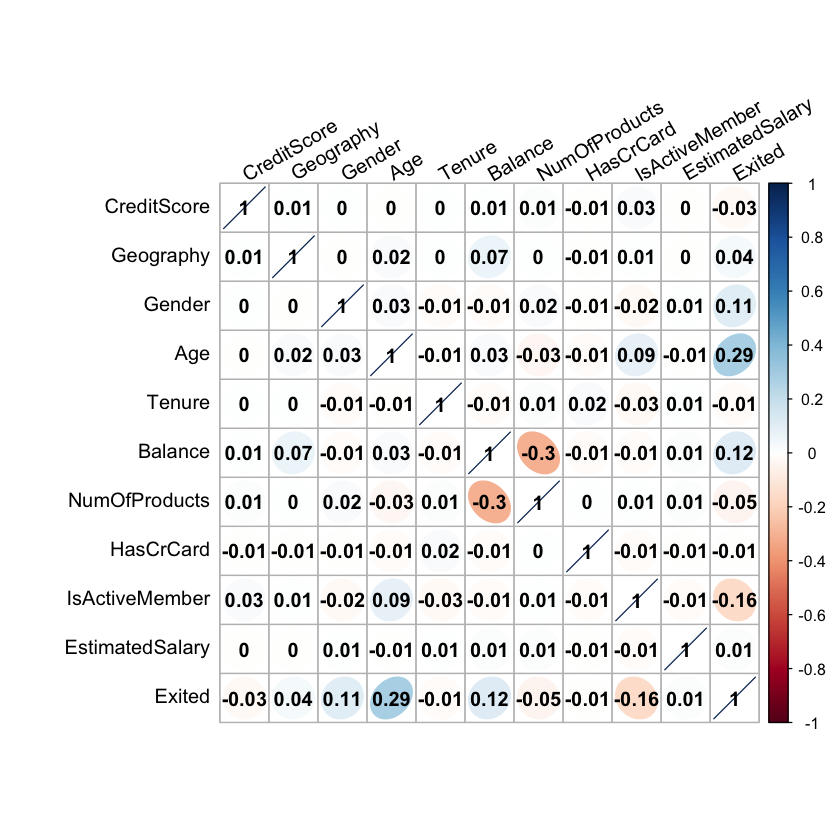

In [10]:
corrs = cor(churn_modelling_v1, method = "pearson")
corrplot(corrs, type = "full", method="ellipse", tl.col="black", 
         tl.srt = 30, addCoef.col = "black")

In [11]:
split = sort(sample(nrow(churn_modelling_v1), nrow(churn_modelling_v1)*.85))
train<-churn_modelling_v1[split,]
test<-churn_modelling_v1[-split,]

In [13]:
summary(train)


  CreditScore      Geography         Gender           Age       
 Min.   :350.0   Min.   :1.000   Min.   :0.000   Min.   :18.00  
 1st Qu.:583.0   1st Qu.:1.000   1st Qu.:0.000   1st Qu.:32.00  
 Median :651.0   Median :1.000   Median :0.000   Median :37.00  
 Mean   :649.9   Mean   :1.745   Mean   :0.454   Mean   :38.89  
 3rd Qu.:717.0   3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:44.00  
 Max.   :850.0   Max.   :3.000   Max.   :1.000   Max.   :92.00  
     Tenure          Balance       NumOfProducts     HasCrCard     
 Min.   : 0.000   Min.   :     0   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:     0   1st Qu.:1.000   1st Qu.:0.0000  
 Median : 5.000   Median : 97030   Median :1.000   Median :1.0000  
 Mean   : 4.985   Mean   : 76382   Mean   :1.528   Mean   :0.7045  
 3rd Qu.: 7.000   3rd Qu.:127555   3rd Qu.:2.000   3rd Qu.:1.0000  
 Max.   :10.000   Max.   :250898   Max.   :4.000   Max.   :1.0000  
 IsActiveMember  EstimatedSalary         Exited      
 Min.   :0.000 

In [14]:
summary(test)

  CreditScore      Geography         Gender           Age       
 Min.   :350.0   Min.   :1.000   Min.   :0.000   Min.   :18.00  
 1st Qu.:590.0   1st Qu.:1.000   1st Qu.:0.000   1st Qu.:32.00  
 Median :654.0   Median :1.000   Median :0.000   Median :37.00  
 Mean   :654.3   Mean   :1.751   Mean   :0.456   Mean   :39.09  
 3rd Qu.:719.2   3rd Qu.:3.000   3rd Qu.:1.000   3rd Qu.:44.00  
 Max.   :850.0   Max.   :3.000   Max.   :1.000   Max.   :84.00  
     Tenure          Balance       NumOfProducts     HasCrCard     
 Min.   : 0.000   Min.   :     0   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:     0   1st Qu.:1.000   1st Qu.:0.0000  
 Median : 5.000   Median : 97505   Median :1.000   Median :1.0000  
 Mean   : 5.171   Mean   : 77075   Mean   :1.543   Mean   :0.7113  
 3rd Qu.: 8.000   3rd Qu.:127874   3rd Qu.:2.000   3rd Qu.:1.0000  
 Max.   :10.000   Max.   :216110   Max.   :4.000   Max.   :1.0000  
 IsActiveMember EstimatedSalary        Exited      
 Min.   :0.00   M

In [22]:
treepredmodel = tree(formula= as.factor(Exited)~CreditScore+Geography+Gender+Age+Tenure+
                       Balance+NumOfProducts+HasCrCard+IsActiveMember+EstimatedSalary
                       , data = train )

In [18]:
summary(treepredmodel)


Regression tree:
tree(formula = Exited ~ CreditScore + Geography + Gender + Age + 
    Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + 
    EstimatedSalary, data = train)
Variables actually used in tree construction:
[1] "Age"            "NumOfProducts"  "IsActiveMember"
Number of terminal nodes:  8 
Residual mean deviance:  0.1172 = 995.2 / 8492 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.96080 -0.13590 -0.04789  0.00000 -0.04789  0.95210 

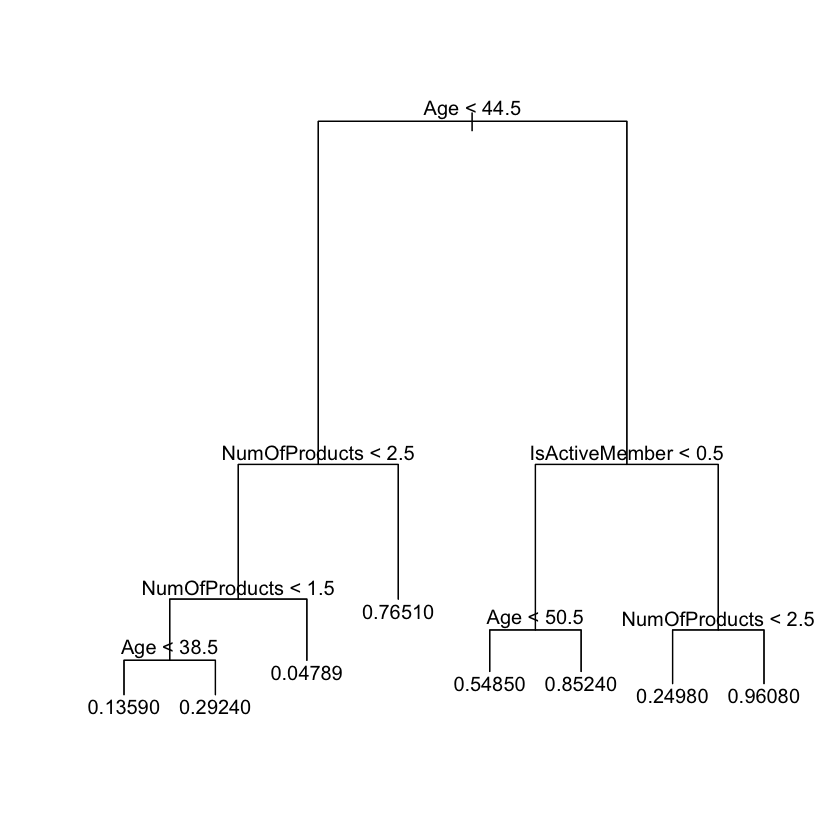

In [19]:
plot(treepredmodel )
text(treepredmodel,pretty=0)

In [24]:
testpredictions = predict(treepredmodel, test, type ="class")

In [25]:

#Find the accuracy of the model
cm =table(testpredictions, test$Exited)


In [26]:
#Display the accuracy of the model in test data
accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
print(accuracy)


[1] 0.8406667


In [27]:
#random forest modek
randomforest_pre_model = randomForest(as.factor(Exited) ~ .,
                          data = train, importance = TRUE, ntree = 50)

summary(randomforest_pre_model)

random_test_prediction= predict(randomforest_pre_model,test,type="class")

cm_for_random=table(random_test_prediction,test$Exited)
accuracy = (cm_for_random[1,1] + cm_for_random[2,2]) / (cm_for_random[1,1] + cm_for_random[2,2] +
                                                          cm_for_random[1,2] + cm_for_random[2,1])
print(accuracy)

                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted        8500  factor numeric  
err.rate          150  -none- numeric  
confusion           6  -none- numeric  
votes           17000  matrix numeric  
oob.times        8500  -none- numeric  
classes             2  -none- character
importance         40  -none- numeric  
importanceSD       30  -none- numeric  
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y                8500  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

[1] 0.8533333
